In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense,Activation,Dropout
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import MinMaxScaler
from geopy.geocoders import Nominatim
from numpy import newaxis

Using TensorFlow backend.


In [2]:
df=pd.read_csv('database.csv')

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
df.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [5]:
df.shape

(23412, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [7]:
df.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [8]:
data=df[['Latitude','Longitude','Magnitude']]

In [9]:
data

,Latitude,Longitude,Magnitude
0,19.2460,145.6160,6.0
1,1.8630,127.3520,5.8
2,-20.5790,-173.9720,6.2
3,-59.0760,-23.5570,5.8
4,11.9380,126.4270,5.8
...,...,...,...
23407,38.3917,-118.8941,5.6
23408,38.3777,-118.8957,5.5
23409,36.9179,140.4262,5.9
23410,-9.0283,118.6639,6.3


In [10]:
mms=MinMaxScaler(feature_range=(0,1))
intensity=mms.fit_transform(data.loc[:,['Magnitude']].values)

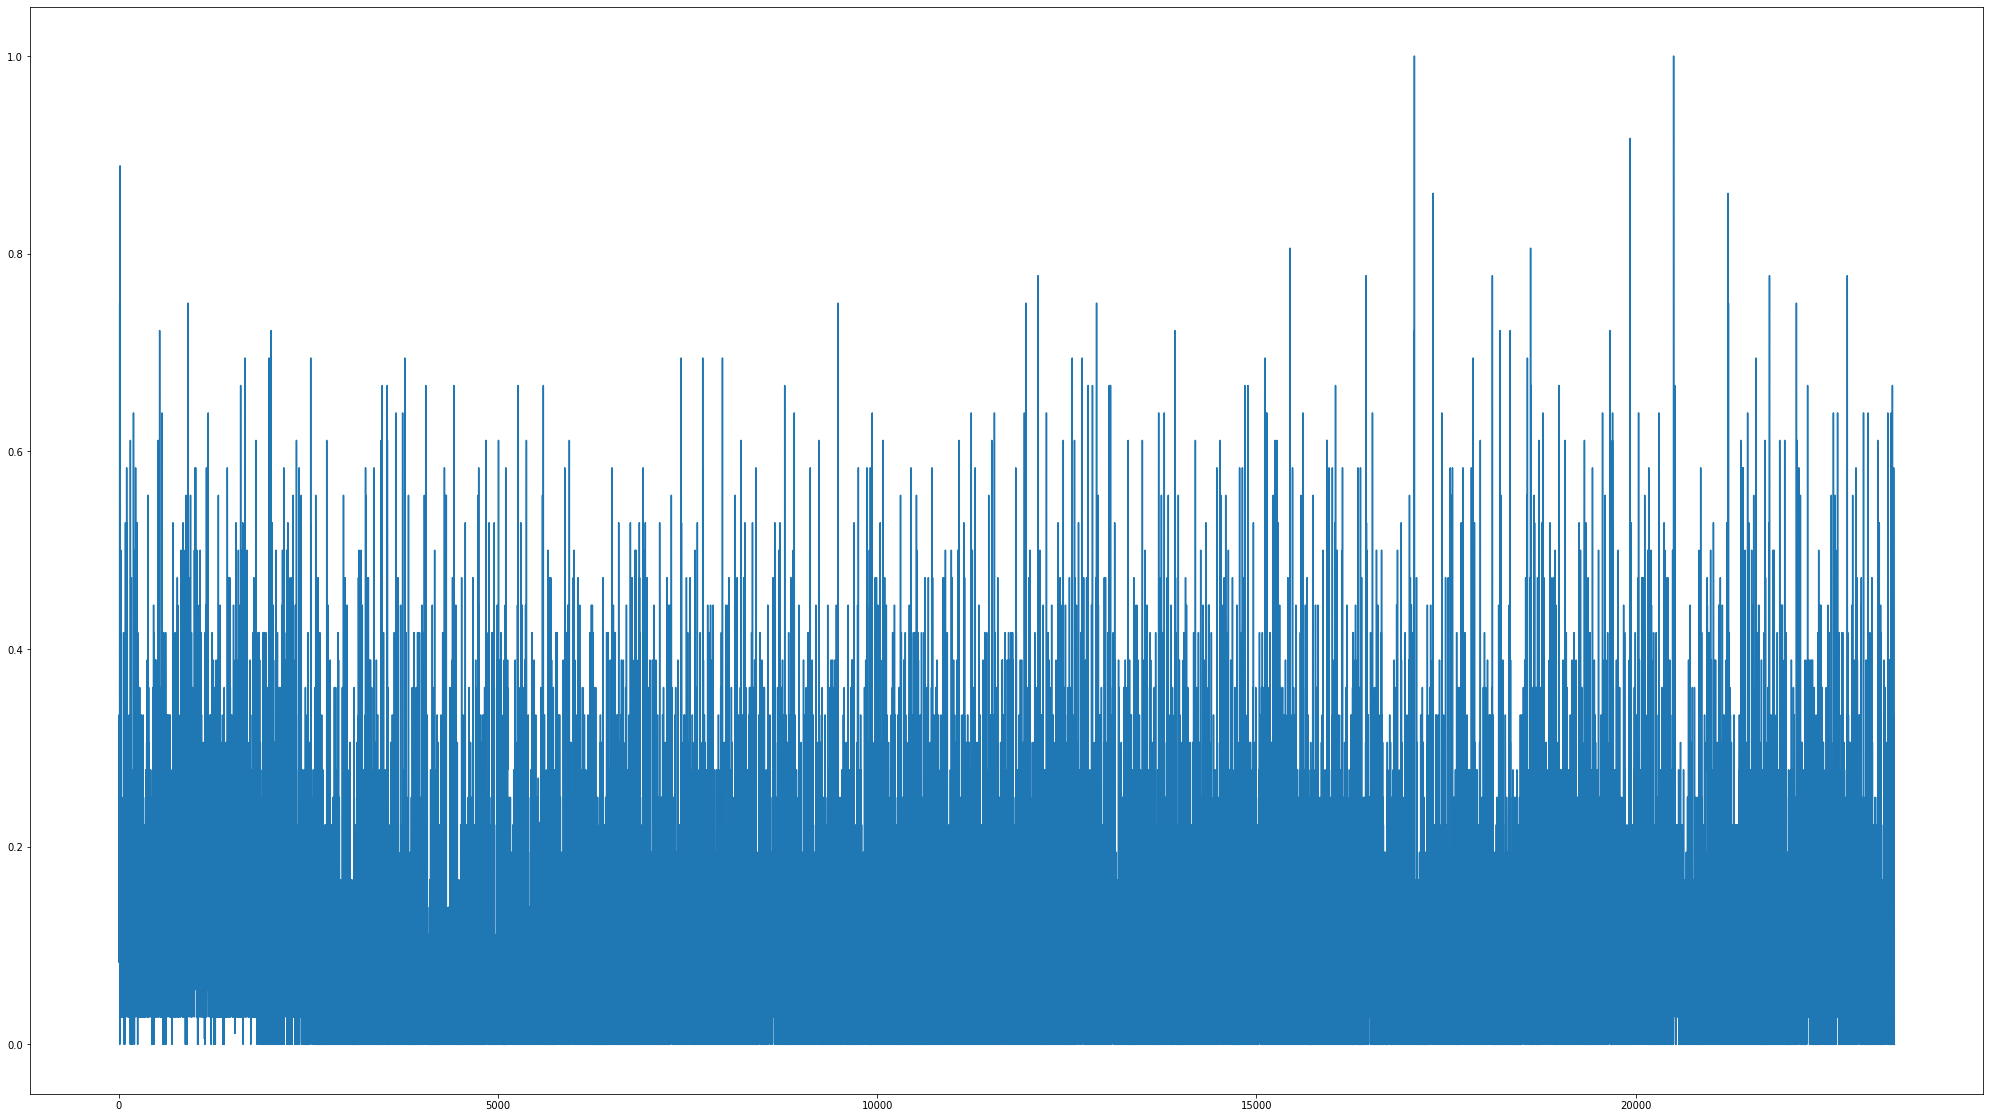

In [11]:
f,ax=plt.subplots(figsize=(35,20))
plt.plot(intensity)
plt.show()

In [12]:
train_size=int(len(data)*0.80)
test_size=len(data)-train_size
train=data[0:train_size]
test=data[train_size:len(data)]

In [13]:
train.shape,test.shape

((18729, 3), (4683, 3))

In [14]:
def create_dataset(data, look_back=1):
    dataX, dataY= [], []
    
    for i in range(len(data)-look_back-1):
        a=data[i:(i+look_back)]
        dataX.append(np.array(a))
        dataY.append(np.array(data[i+look_back:i+look_back+1]))
        
        return np.array(dataX),np.array(dataY)
    

In [15]:
look_back=50
xtrain,ytrain=create_dataset(train, look_back)

In [16]:
xtrain.shape,ytrain.shape

((1, 50, 3), (1, 1, 3))

In [17]:
#Building the model
model=Sequential()
model.reset_states()

model.add(LSTM(input_dim =3,output_dim = 100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(output_dim=3))
model.add(Activation('linear'))

model.compile(loss='mse',optimizer='adam')
model.summary()

C:\Users\wallace\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
C:\Users\wallace\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 3), units=100)`
  """


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 100)         41600     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 100)         80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 3)           303       
_________________________________________________________________
activation_1 (Activation)    (None, None, 3)           0         
Total params: 122,303
Trainable params: 122,303
Non-trainable params: 0
________________________________________________

C:\Users\wallace\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
  # This is added back by InteractiveShellApp.init_path()


In [18]:
model.fit(xtrain,ytrain,batch_size=200, epochs=500,verbose=1)

Epoch 1/500
1/1 [==============================] - 5s 5s/step - loss: 9676.1982
Epoch 2/500
1/1 [==============================] - 0s 136ms/step - loss: 9639.1748
Epoch 3/500
1/1 [==============================] - 0s 143ms/step - loss: 9583.6670
Epoch 4/500
1/1 [==============================] - 0s 200ms/step - loss: 9535.9863
Epoch 5/500
1/1 [==============================] - 0s 112ms/step - loss: 9479.9824
Epoch 6/500
1/1 [==============================] - 0s 154ms/step - loss: 9419.3857
Epoch 7/500
1/1 [==============================] - 0s 109ms/step - loss: 9354.9414
Epoch 8/500
1/1 [==============================] - 0s 139ms/step - loss: 9299.8379
Epoch 9/500
1/1 [==============================] - 0s 128ms/step - loss: 9243.5273
Epoch 10/500
1/1 [==============================] - 0s 125ms/step - loss: 9192.2852
Epoch 11/500
1/1 [==============================] - 0s 130ms/step - loss: 9135.7314
Epoch 12/500
1/1 [==============================] - 0s 230ms/step - loss: 9082.1885
Epoc

Epoch 99/500
1/1 [==============================] - 0s 123ms/step - loss: 7302.9927
Epoch 100/500
1/1 [==============================] - 0s 157ms/step - loss: 7286.9771
Epoch 101/500
1/1 [==============================] - 0s 133ms/step - loss: 7267.1914
Epoch 102/500
1/1 [==============================] - 0s 128ms/step - loss: 7265.1992
Epoch 103/500
1/1 [==============================] - 0s 138ms/step - loss: 7250.0527
Epoch 104/500
1/1 [==============================] - 0s 252ms/step - loss: 7243.6050
Epoch 105/500
1/1 [==============================] - 0s 153ms/step - loss: 7207.0957
Epoch 106/500
1/1 [==============================] - 0s 184ms/step - loss: 7179.6289
Epoch 107/500
1/1 [==============================] - 0s 164ms/step - loss: 7207.6768
Epoch 108/500
1/1 [==============================] - 0s 154ms/step - loss: 7201.3735
Epoch 109/500
1/1 [==============================] - 0s 190ms/step - loss: 7178.8262
Epoch 110/500
1/1 [==============================] - 1s 501ms/step

Epoch 196/500
1/1 [==============================] - 0s 125ms/step - loss: 6275.0225
Epoch 197/500
1/1 [==============================] - 0s 123ms/step - loss: 6299.4531
Epoch 198/500
1/1 [==============================] - 0s 114ms/step - loss: 6251.6289
Epoch 199/500
1/1 [==============================] - 0s 125ms/step - loss: 6282.0688
Epoch 200/500
1/1 [==============================] - 0s 279ms/step - loss: 6256.2100
Epoch 201/500
1/1 [==============================] - 1s 590ms/step - loss: 6247.1680
Epoch 202/500
1/1 [==============================] - 0s 133ms/step - loss: 6261.5181
Epoch 203/500
1/1 [==============================] - 0s 125ms/step - loss: 6175.6221
Epoch 204/500
1/1 [==============================] - 0s 165ms/step - loss: 6299.5083
Epoch 205/500
1/1 [==============================] - 0s 329ms/step - loss: 6224.5923
Epoch 206/500
1/1 [==============================] - 0s 121ms/step - loss: 6200.8999
Epoch 207/500
1/1 [==============================] - 0s 109ms/ste

Epoch 293/500
1/1 [==============================] - 0s 149ms/step - loss: 5501.7827
Epoch 294/500
1/1 [==============================] - 0s 120ms/step - loss: 5469.4590
Epoch 295/500
1/1 [==============================] - 0s 154ms/step - loss: 5465.9639
Epoch 296/500
1/1 [==============================] - 0s 144ms/step - loss: 5416.2983
Epoch 297/500
1/1 [==============================] - 0s 141ms/step - loss: 5405.9556
Epoch 298/500
1/1 [==============================] - 0s 441ms/step - loss: 5489.1782
Epoch 299/500
1/1 [==============================] - 0s 303ms/step - loss: 5391.3813
Epoch 300/500
1/1 [==============================] - 0s 125ms/step - loss: 5362.4814
Epoch 301/500
1/1 [==============================] - 0s 125ms/step - loss: 5371.4780
Epoch 302/500
1/1 [==============================] - 0s 156ms/step - loss: 5452.9092
Epoch 303/500
1/1 [==============================] - 0s 109ms/step - loss: 5405.0889
Epoch 304/500
1/1 [==============================] - 0s 112ms/ste

Epoch 390/500
1/1 [==============================] - 0s 156ms/step - loss: 4721.9414
Epoch 391/500
1/1 [==============================] - 0s 156ms/step - loss: 4704.9683
Epoch 392/500
1/1 [==============================] - 0s 156ms/step - loss: 4712.2061
Epoch 393/500
1/1 [==============================] - 0s 141ms/step - loss: 4707.9448
Epoch 394/500
1/1 [==============================] - 0s 141ms/step - loss: 4697.4175
Epoch 395/500
1/1 [==============================] - 0s 125ms/step - loss: 4720.2476
Epoch 396/500
1/1 [==============================] - 0s 113ms/step - loss: 4653.1489
Epoch 397/500
1/1 [==============================] - 0s 156ms/step - loss: 4696.8813
Epoch 398/500
1/1 [==============================] - 0s 137ms/step - loss: 4688.3589
Epoch 399/500
1/1 [==============================] - 0s 253ms/step - loss: 4639.3643
Epoch 400/500
1/1 [==============================] - 0s 217ms/step - loss: 4713.1562
Epoch 401/500
1/1 [==============================] - 0s 125ms/ste

Epoch 487/500
1/1 [==============================] - 0s 150ms/step - loss: 4041.1382
Epoch 488/500
1/1 [==============================] - 0s 110ms/step - loss: 4115.2939
Epoch 489/500
1/1 [==============================] - 0s 188ms/step - loss: 4060.2766
Epoch 490/500
1/1 [==============================] - 0s 218ms/step - loss: 4013.1157
Epoch 491/500
1/1 [==============================] - 0s 215ms/step - loss: 4013.3503
Epoch 492/500
1/1 [==============================] - 0s 134ms/step - loss: 4056.4260
Epoch 493/500
1/1 [==============================] - 0s 141ms/step - loss: 4058.4360
Epoch 494/500
1/1 [==============================] - 0s 109ms/step - loss: 4088.3428
Epoch 495/500
1/1 [==============================] - 0s 109ms/step - loss: 4031.0703
Epoch 496/500
1/1 [==============================] - 0s 220ms/step - loss: 4080.3608
Epoch 497/500
1/1 [==============================] - 0s 260ms/step - loss: 4024.1428
Epoch 498/500
1/1 [==============================] - 0s 125ms/ste

In [19]:
test.shape

(4683, 3)

In [20]:
xtest,ytest=create_dataset(test,look_back)

In [21]:
testa=np.array(xtest[0:1])

In [ ]:
model.predict(testa)